# Explore here

In [3]:
import pandas as pd
data_sales = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

data_sales.shape

(366, 2)

In [4]:
data_sales.dtypes

date      object
sales    float64
dtype: object

In [5]:
data_sales.isna().sum()

date     0
sales    0
dtype: int64

In [6]:
data_sales.duplicated().sum()

np.int64(0)

In [7]:
data_sales.nunique()

date     366
sales    366
dtype: int64

In [8]:
data_sales.date = pd.to_datetime(data_sales.date)

In [9]:
data_sales

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [10]:
data_sales.set_index('date', inplace=True, drop=True)

In [11]:
data_sales.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


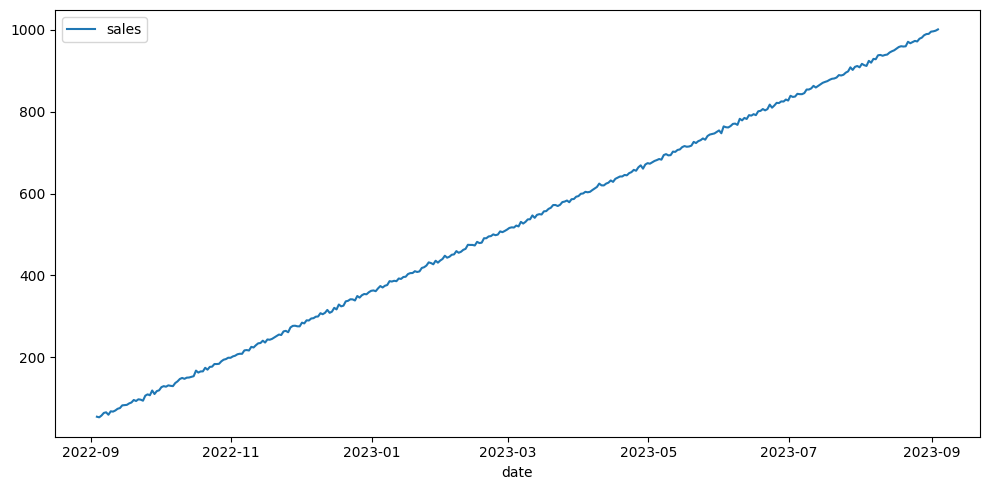

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=data_sales)

plt.tight_layout()

plt.show()


In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


result = test_stationarity(data_sales)

print(result)


Resultados de la prueba de Dickey-Fuller:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_sales)
decomposition


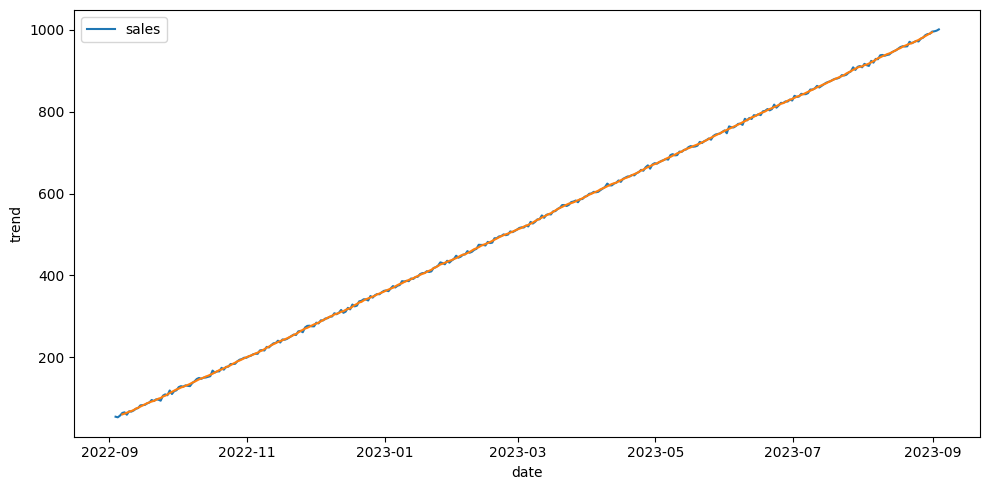

In [23]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data_sales)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

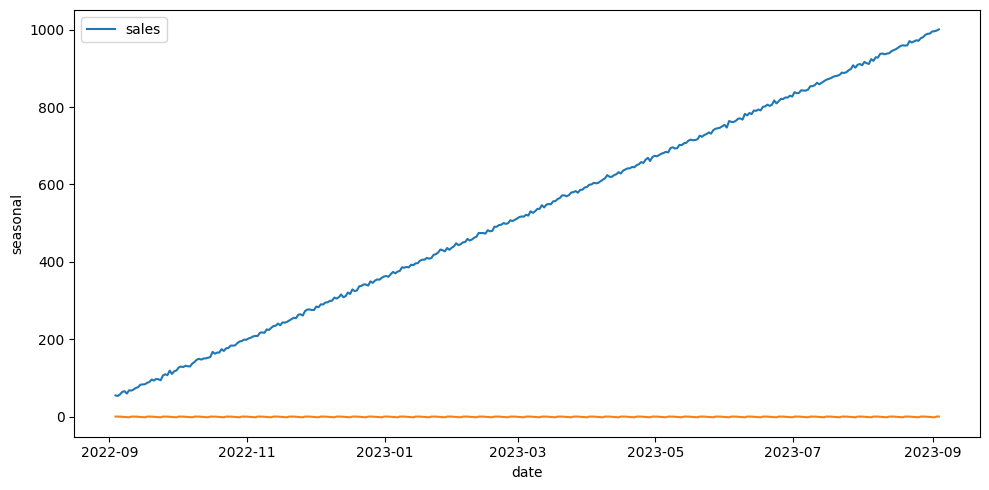

In [24]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data_sales)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [25]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(data_sales)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

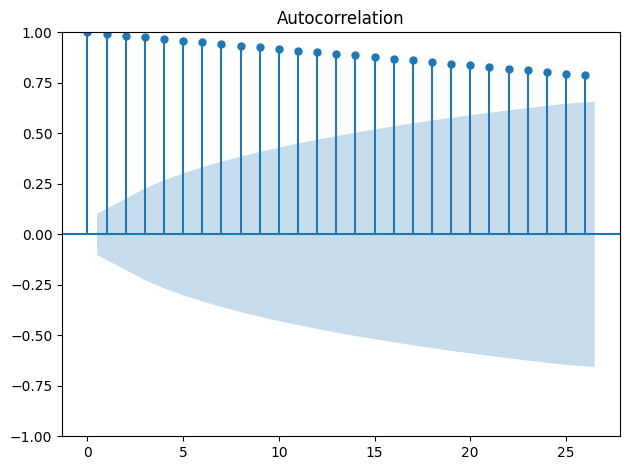

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_sales)

plt.tight_layout()

plt.show()

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data_sales, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(steps=10)




/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


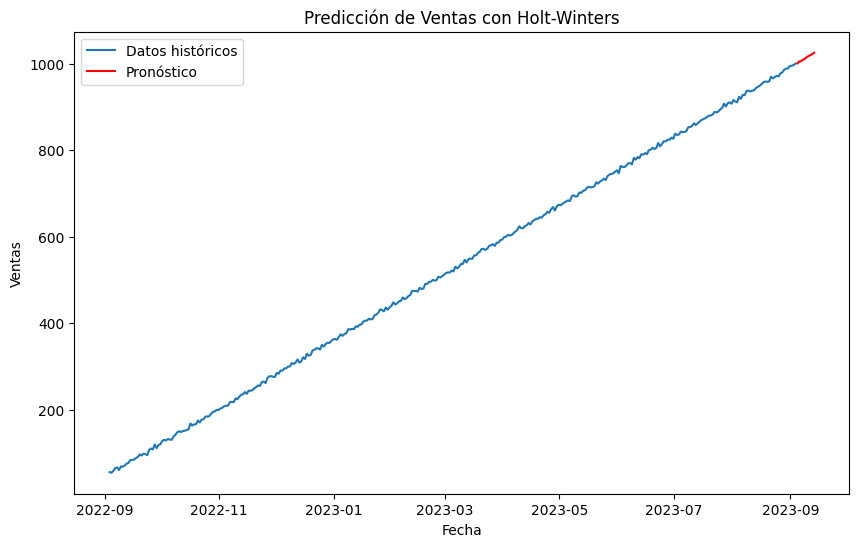

In [61]:
# Aplicar el modelo de Holt-Winters
model = ExponentialSmoothing(data_sales, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Hacer predicciones
forecast = fit.forecast(steps=10)

# Mostrar los resultados
plt.figure(figsize=(10, 6))
plt.plot(data_sales, label='Datos históricos')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Predicción de Ventas con Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()




/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


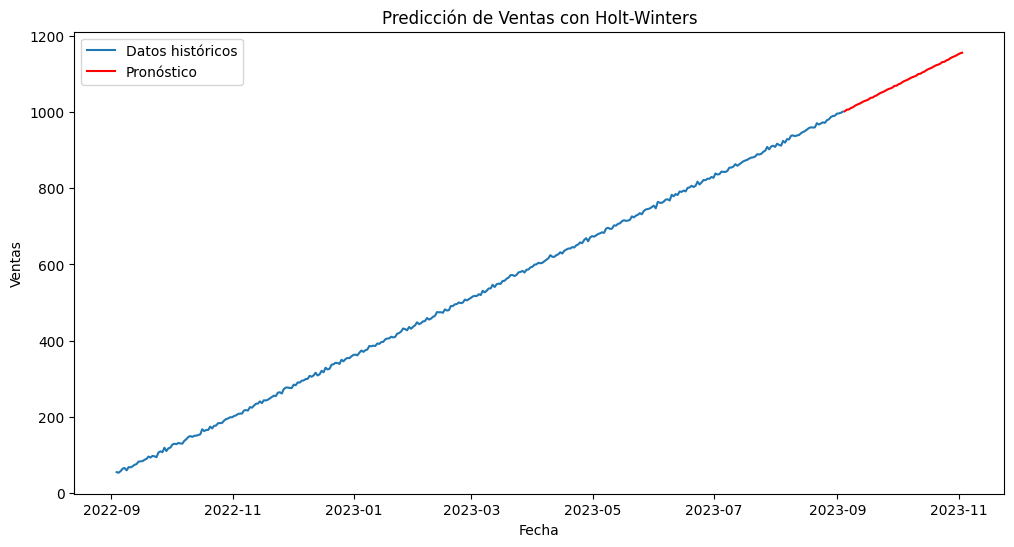

In [63]:
model = ExponentialSmoothing(data_sales, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Hacer predicciones para 60 pasos futuros
forecast = fit.forecast(steps=60)

# Mostrar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data_sales, label='Datos históricos')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Predicción de Ventas con Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

He utilizado otro HOltWinters porque arima y prophet me salían error 

en prophet me salía este error AttributeError: np.float_ was removed in the NumPy 2.0 release. Use np.float64 instead.

y en Arima me salía ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject =( 